<a href="https://colab.research.google.com/github/rubaiyat-sholi/ML_GoldPricePrediction_RandomForestRegressor/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# Loading CSV data to Pandas DataFrame
gold_data = pd.read_csv("/content/drive/MyDrive/ML_practise_project/gld_price_data.csv")

In [4]:
# print first 5 rows of dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# numbers of rows and comuns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Positive
2. Negative

In [10]:
correlation = gold_data.corr()

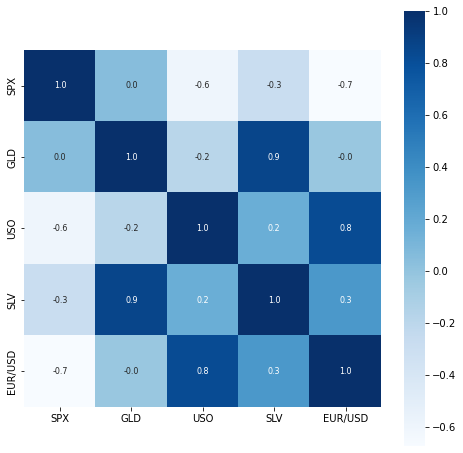

In [11]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


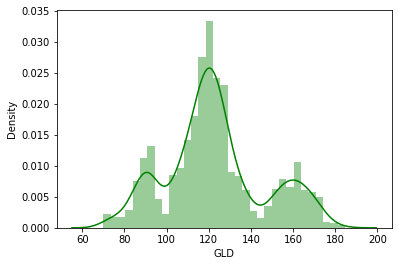

In [13]:
# checking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting Features and Target

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

Model Training: Random Forest Regressor

In [27]:
regressor = RandomForestRegressor(n_estimators=100)
# traning the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evalution

In [19]:
# Prediction on Test data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.35299914  81.968      115.97590027 127.68010074 120.80620114
 154.76819766 150.35709832 125.98330047 117.53319892 125.9835009
 116.98220081 171.71940061 141.22129782 167.35849865 115.29799988
 117.65300059 139.24160356 170.05640022 159.48780341 158.84319927
 155.21610042 125.22389989 176.63149972 157.7269037  125.23260037
  93.95779991  77.92189991 120.5207     119.02709918 167.52080058
  88.16830079 125.3076001   91.31480075 117.65970045 121.03019932
 136.86920065 115.58410089 114.93930055 147.25199908 107.29060112
 104.41680258  87.27099821 126.4354007  118.06360025 154.17219911
 119.47100003 108.41560039 107.95049843  93.20120073 127.16739773
  75.32260041 113.68209945 121.45620039 111.19289921 118.76959862
 120.64509915 159.70490045 167.19870161 146.83349698  86.06529894
  94.2346004   86.84229858  90.52469967 119.01500069 126.33630055
 127.61540003 168.60629992 122.27459937 117.32739896  98.2877999
 167.93459984 143.15559822 132.19900226 121.16550207 121.05769962
 119.8826001

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9899295375469223


Comparing between Actual values and Predicted values

In [22]:
Y_test = list(Y_test)

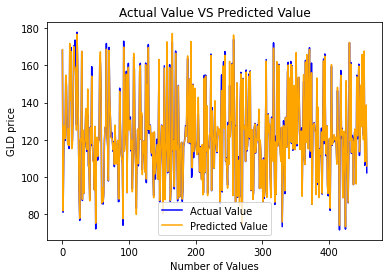

In [23]:
plt.plot(Y_test, color="blue", label="Actual Value")
plt.plot(test_data_prediction, color="orange", label="Predicted Value")
plt.title("Actual Value VS Predicted Value")
plt.xlabel("Number of Values")
plt.ylabel("GLD price")
plt.legend()
plt.show()